## **Soal 1**

**Statistik Deskriptif**

* Ekstrak dan analisis statistik deskriptif yang relevan dari dataset.
* Interpretasikan hasilnya untuk memberikan wawasan mengenai distribusi dan karakteristik variabel-variabel penting, seperti pendapatan dan tingkat pendidikan.

## **Soal 2**

**Uji Hipotesis**

* Lakukan uji hipotesis yang tepat untuk menentukan apakah ada hubungan yang signifikan secara statistik antara pendidikan dan pendapatan.
* Jelaskan hipotesis nol (*null hypothesis*) dan hipotesis alternatif.
* Paparkan metodologi yang digunakan serta hasil uji hipotesis, termasuk nilai p dan asumsi-asumsi yang diperlukan.
* Interpretasikan hasil uji dan simpulkan berdasarkan temuan tersebut.

## Import Modules

In [ ]:
! pip install matplotlib
! pip install seaborn
!pip install pingouin

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.4/204.4 kB 4.0 MB/s eta 0:00:00


In [ ]:
# Dataframe Libraries
import pandas as pd

# Array Libraries
import numpy as np

# Data Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Math libraries
import math

# Statistic libraries
from scipy import stats
import pingouin as pg

## Dataset

In [ ]:
#Menampilkan seluruh kolom
pd.set_option('display.max_columns', None)

In [ ]:
#Membaca dataset untuk Google Colab
df = pd.read_csv('marketing_campaign.csv', sep='\t')
#Menampilkan 5 baris teratas dataframe
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [ ]:
#Melihat deskripsi singkat dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

## **Soal 1**

**Statistik Deskriptif**

* Ekstrak dan analisis statistik deskriptif yang relevan dari dataset.
* Interpretasikan hasilnya untuk memberikan wawasan mengenai distribusi dan karakteristik variabel-variabel penting, seperti pendapatan dan tingkat pendidikan.


In [ ]:
#Melihat statistik deskriptif dari keseluruhan data yang bertipe numerik (int, float)
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [ ]:
#Melihat statistik deskriptif dari keseluruhan data yang bertipe kategorik (object)
df.describe(include=['object'])

,Education,Marital_Status,Dt_Customer
count,2240,2240,2240
unique,5,8,663
top,Graduation,Married,31-08-2012
freq,1127,864,12


In [ ]:
#Mencari jumlah nilai unik dari kolom Education dalam dataset
df["Education"].value_counts()

,count
Education,
Graduation,1127
PhD,486
Master,370
2n Cycle,203
Basic,54


In [ ]:
df["Education"].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [ ]:
#Mencari jumlah nilai unik dari kolom Marital_Status dalam dataset
df["Marital_Status"].value_counts()

,count
Marital_Status,
Married,864
Together,580
Single,480
Divorced,232
Widow,77
Alone,3
Absurd,2
YOLO,2


In [ ]:
df["Marital_Status"].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [ ]:
#Mencari jumlah nilai unik dari kolom Dt_Customer dalam dataset
df["Dt_Customer"].value_counts()

,count
Dt_Customer,
31-08-2012,12
12-09-2012,11
14-02-2013,11
12-05-2014,11
20-08-2013,10
...,...
05-08-2012,1
18-11-2012,1
25-05-2013,1


## **Visualisasi Persebaran Data**

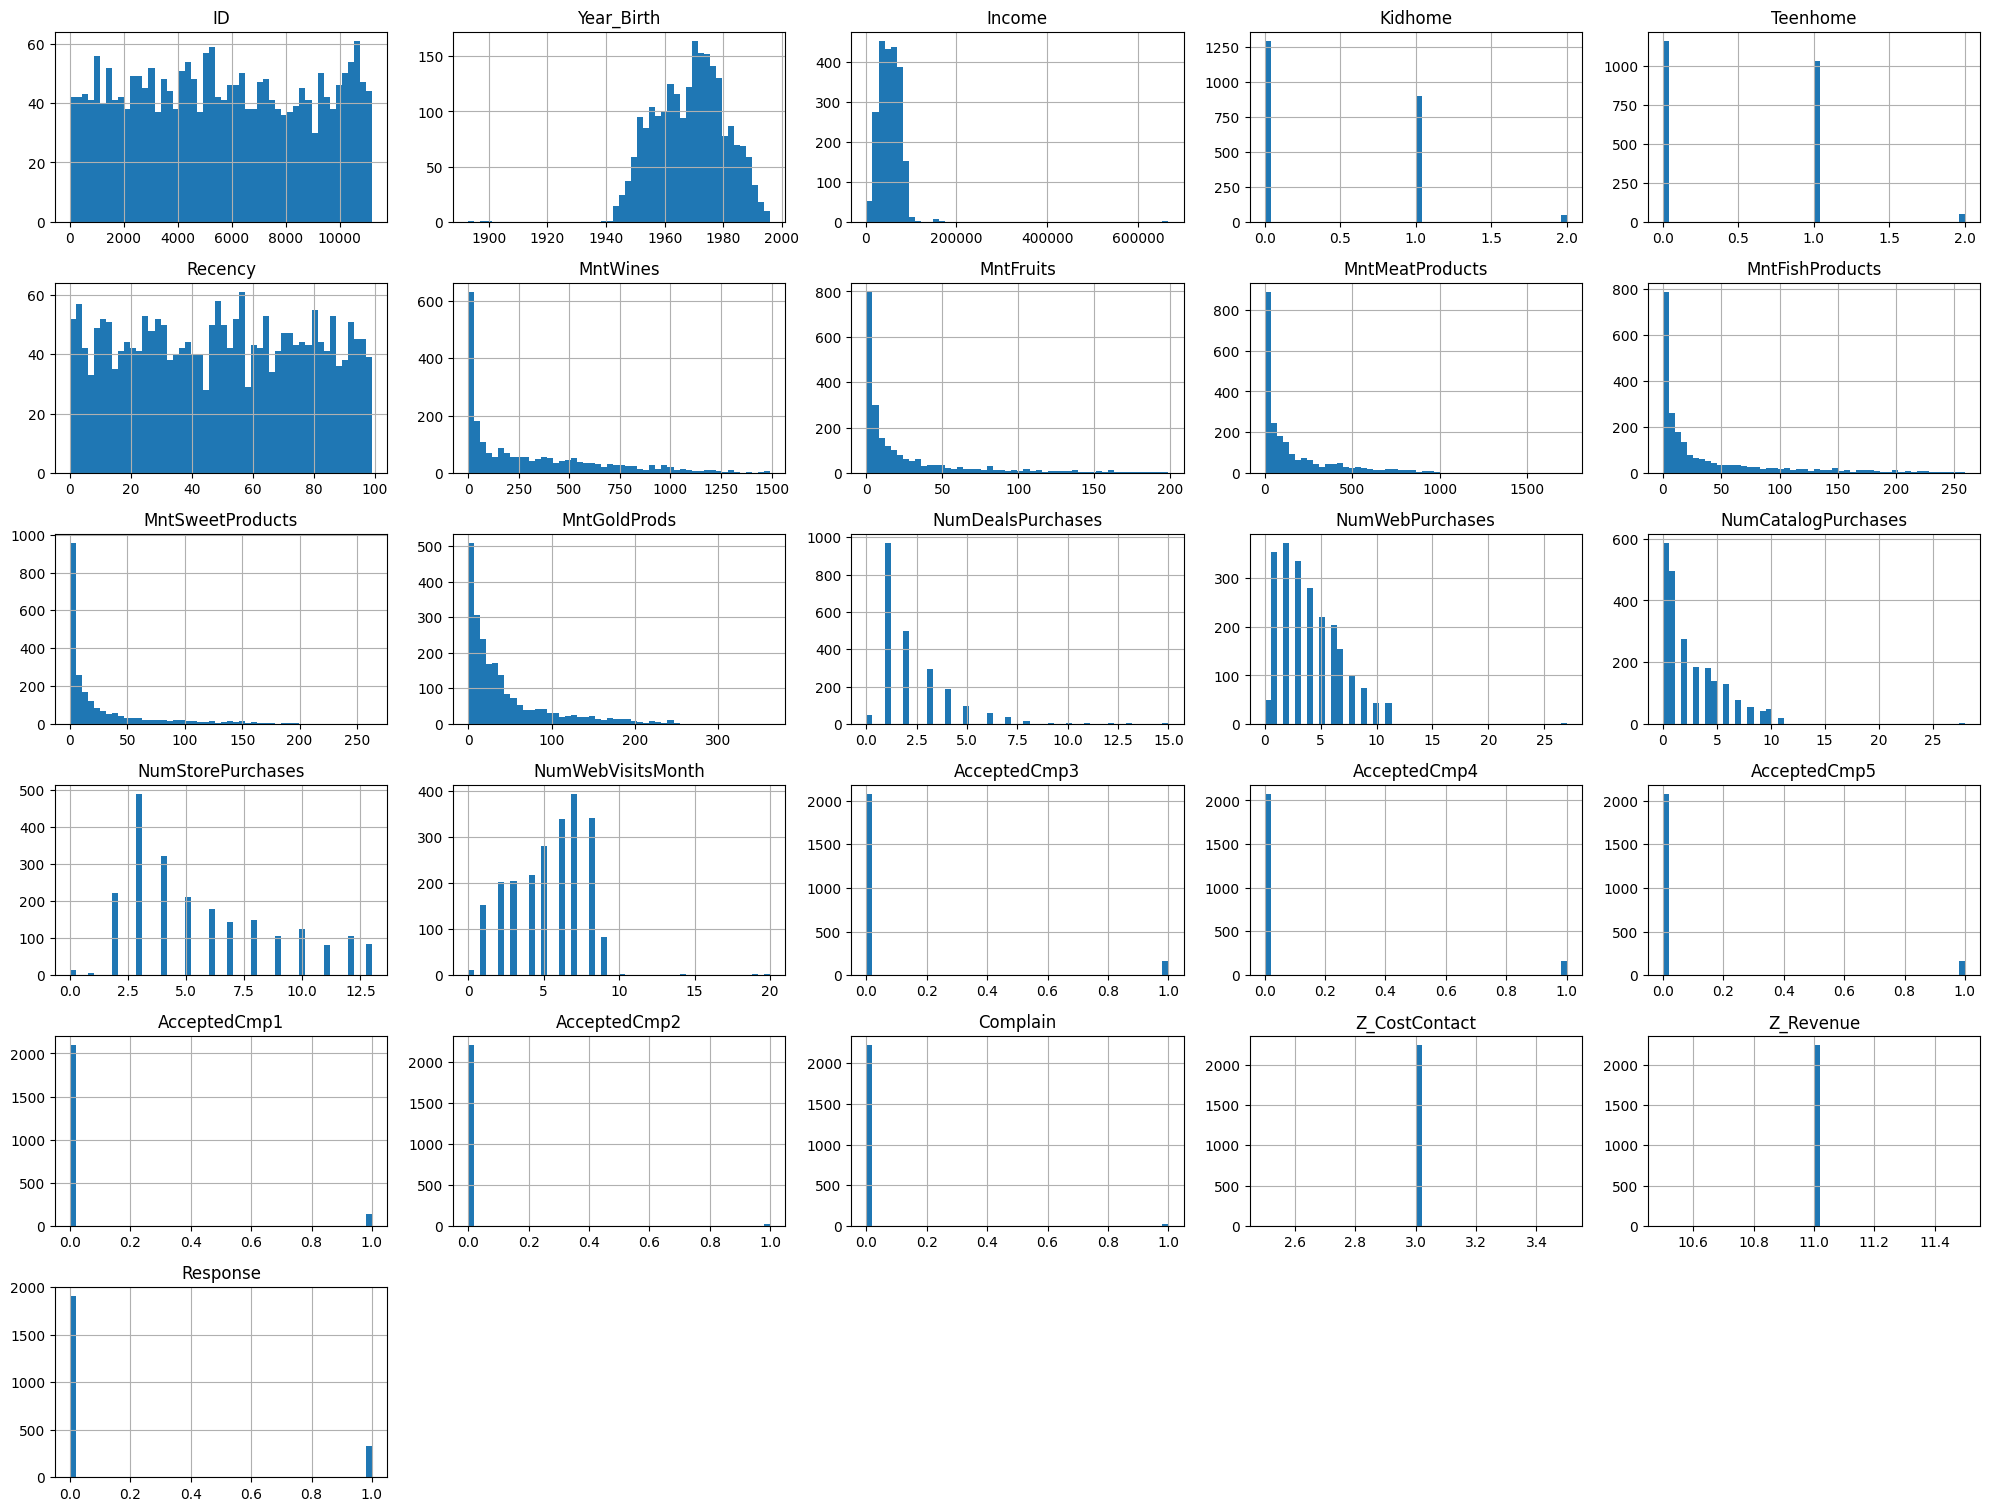

In [ ]:
# Membuat histogram untuk setiap kolom dengan nilai numerik
df.hist(bins=50, figsize=(20, 20), layout=(8,5))  #Menyesuaikan jumlah bin, tinggi dan lebar keseluruhan grafik, dan berapa baris dan kolom
plt.tight_layout()  #Menyesuaikan tata letak untuk mencegah tumpang tindih
plt.show()

<Axes: xlabel='Income', ylabel='Count'>

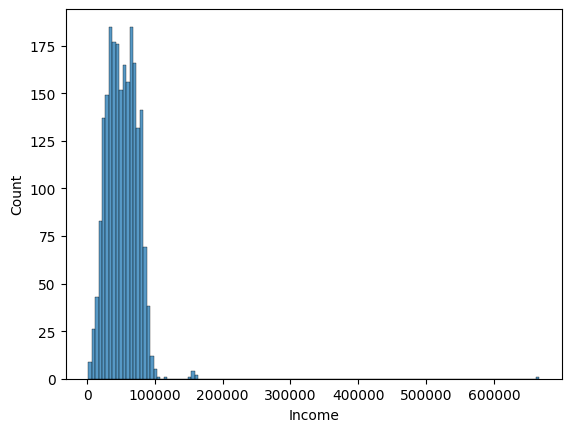

In [ ]:
# Melihat histogram kolom income lebih detail
sns.histplot(data=df, x='Income')

<Axes: xlabel='Year_Birth', ylabel='Count'>

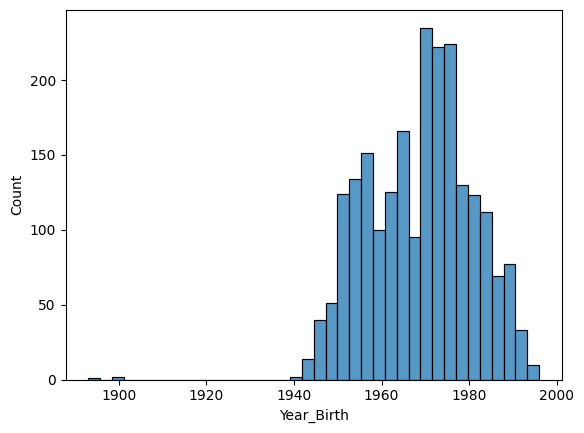

In [ ]:
# Melihat histogram kolom Year_Birth lebih detail
sns.histplot(data=df, x='Year_Birth')

<Axes: xlabel='Recency', ylabel='Count'>

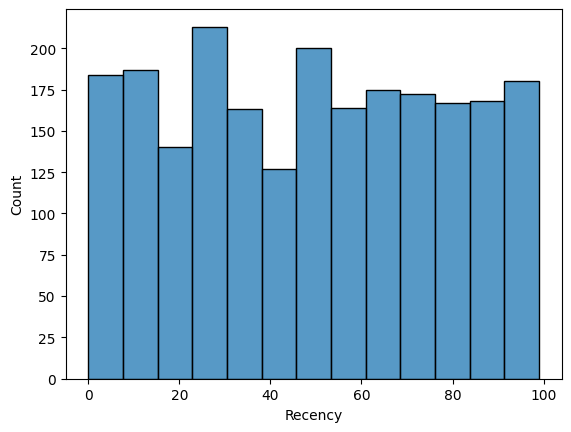

In [ ]:
# Melihat histogram kolom Recency lebih detail
sns.histplot(data=df, x='Recency')

## **Analisis**

## **ID**
- Jumlah 2240 menunjukkan bahwa ada 2240 entri unik dalam dataset.

## **Year_Birth**
- Rata-rata tahun lahir adalah 1968,81, menunjukkan bahwa sebagian besar individu lahir di akhir 60-an, memberi kita demografi yang lebih matang.
- Tahun lahir minimum 1893 sangat rendah, kemungkinan termasuk kesalahan entri data atau outlier.
- Maksimum tahun lahir 1996, sejalan dengan orang dewasa muda, yang menunjukkan rentang usia luas dari sekitar 27 hingga lebih dari 100 tahun.
- Standar deviasi adalah 12,06, menunjukkan variasi sedang dalam tahun lahir, menunjukkan kelompok usia yang relatif terkonsentrasi.
- 25% dari individu lahir sebelum tahun 1959.
- Median adalah tahun 1970, menunjukkan bahwa separuh individu lahir sebelum tahun ini.
- 75% dari individu lahir sebelum tahun 1977.

## **Income**
- Rata-rata pendapatan sekitar 52.247,25, dengan variasi yang substansial (standar deviasi 25.173,08), menunjukkan ketimpangan pendapatan yang luas.
- Pendapatan maksimum 666.666 adalah outlier ekstrem, jauh lebih tinggi dari persentil ke-75, kemungkinan mempengaruhi data secara signifikan.
- Pendapatan minimum 173 menunjukkan beberapa individu berpendapatan sangat rendah, menyoroti keragaman ekonomi.
-25% dari individu memiliki pendapatan di bawah 35303.00.
-Median pendapatan adalah 51381.50, menunjukkan separuh individu memiliki pendapatan di bawah angka ini.
-75% dari individu memiliki pendapatan di bawah 68522.00.

## **Kidhome** dan **Teenhome**
- **Kidhome**: Rata-rata 0,43 menunjukkan sebagian besar rumah tangga memiliki kurang dari satu anak secara rata-rata. Standar deviasi 0,54 menunjukkan variabilitas, tetapi umumnya jumlah anak rendah. 25% dari rumah tangga tidak memiliki anak kecil. Median adalah 0.00, menunjukkan separuh rumah tangga tidak memiliki anak kecil.75% dari rumah tangga memiliki maksimal 1 anak kecil.
- **Teenhome**: Rata-rata 0,22 menunjukkan lebih sedikit remaja per rumah tangga. Standar deviasi 0,43 menunjukkan sebagian besar rumah tangga tidak memiliki atau hanya memiliki satu remaja. 25% dari rumah tangga tidak memiliki remaja. Median adalah 0.00, menunjukkan separuh rumah tangga tidak memiliki remaja. 75% dari rumah tangga memiliki maksimal 1 remaja.

## **Recency**
- Rata-rata 49,10 hari menunjukkan pembelian terakhir rata-rata terjadi sekitar tujuh minggu yang lalu.
- Standar deviasi 28,85 menunjukkan variasi besar dalam keterlibatan pelanggan.
- Kisaran dari 0 hingga 99 hari menunjukkan keterlibatan pelanggan yang sangat bervariasi, dari sangat baru hingga lebih dari tiga bulan yang lalu.
- 25% dari pembelian terakhir terjadi dalam 24 hari terakhir.
- Median adalah 49, menunjukkan bahwa separuh pembelian terjadi dalam 49 hari terakhir.
- 75% dari pembelian terakhir terjadi dalam 74 hari terakhir.

## **Kebiasaan Pengeluaran**
- **MntWines** (Rata-rata 303,94): Pengeluaran tertinggi menunjukkan anggur adalah produk populer.25% dari individu menghabiskan kurang dari 23.75 untuk anggur.Median adalah 173.50, menunjukkan separuh individu menghabiskan kurang dari jumlah ini untuk anggur.75% dari individu menghabiskan kurang dari 504.25 untuk anggur.
- **MntFruits** (Rata-rata 26,30): Pengeluaran lebih rendah untuk buah-buahan, kemungkinan item prioritas rendah atau berbiaya rendah. 25% dari individu menghabiskan kurang dari 1.00 untuk buah-buahan. Median adalah 8.00, menunjukkan separuh individu menghabiskan kurang dari jumlah ini untuk buah-buahan.75% dari individu menghabiskan kurang dari 33.00 untuk buah-buahan.
- **MntMeatProducts** (Rata-rata 166,95): Pengeluaran signifikan menunjukkan produk daging adalah item kunci. 25% dari individu menghabiskan kurang dari 6.00 untuk produk daging. Median adalah 67.00, menunjukkan separuh individu menghabiskan kurang dari jumlah ini untuk produk daging. 75% dari individu menghabiskan kurang dari 232.00 untuk produk daging.
- **MntFishProducts** (Rata-rata 37,50): Pengeluaran moderat, produk ikan tidak terlalu populer. 25% dari individu menghabiskan kurang dari 3.00 untuk produk ikan. Median adalah 12.00, menunjukkan separuh individu menghabiskan kurang dari jumlah ini untuk produk ikan. 75% dari individu menghabiskan kurang dari 50.00 untuk produk ikan.
- **MntSweetProducts** (Rata-rata 27,06): Mirip dengan buah-buahan, menunjukkan bagian kecil dari total pengeluaran. 25% dari individu menghabiskan kurang dari 1.00 untuk manisan. Median adalah 8.00, menunjukkan separuh individu menghabiskan kurang dari jumlah ini untuk manisan.75% dari individu menghabiskan kurang dari 33.00 untuk manisan.
- **MntGoldProds** (Rata-rata 44,02): Menunjukkan minat tetapi bukan kategori pengeluaran utama. 25% dari individu menghabiskan kurang dari 9.00 untuk produk emas. Median adalah 24.00, menunjukkan separuh individu menghabiskan kurang dari jumlah ini untuk produk emas. 75% dari individu menghabiskan kurang dari 56.00 untuk produk emas.

##**NumDealsPurchases**
- Jumlah entri adalah 2240, menunjukkan banyaknya sampel dalam dataset.
- Rata-rata pembelian kesepakatan adalah 2.33, menunjukkan bahwa rata-rata individu melakukan sekitar 2-3 pembelian kesepakatan.
- Standar deviasi 1.93 menunjukkan variasi yang cukup besar dalam jumlah pembelian kesepakatan antar individu.
- Minimum 0 menunjukkan ada individu yang tidak melakukan pembelian kesepakatan sama sekali.
- Kuartil ke-25 adalah 1, yang berarti 25% individu melakukan 1 atau lebih sedikit pembelian kesepakatan.
- Median (kuartil ke-50) adalah 2, menunjukkan separuh individu melakukan 2 atau lebih sedikit pembelian kesepakatan.
- Kuartil ke-75 adalah 3, yang berarti 75% individu melakukan 3 atau lebih sedikit pembelian kesepakatan.
- Maksimum 15 menunjukkan ada individu yang melakukan hingga 15 pembelian kesepakatan.

## **NumWebPurchases**
- Jumlah entri adalah 2240.
- Rata-rata pembelian web adalah 4.08, menunjukkan bahwa rata-rata individu melakukan sekitar 4 pembelian web.
- Standar deviasi 2.78 menunjukkan variasi yang besar dalam jumlah pembelian web.
- Minimum 0 menunjukkan ada individu yang tidak melakukan pembelian web sama sekali.
- Kuartil ke-25 adalah 2, yang berarti 25% individu melakukan 2 atau lebih sedikit pembelian web.
- Median adalah 4, menunjukkan separuh individu melakukan 4 atau lebih sedikit pembelian web.
- Kuartil ke-75 adalah 6, yang berarti 75% individu melakukan 6 atau lebih sedikit pembelian web.
- Maksimum 27 menunjukkan ada individu yang melakukan hingga 27 pembelian web.

## **NumCatalogPurchases**
- Jumlah entri adalah 2240.
- Rata-rata pembelian katalog adalah 2.66, menunjukkan bahwa rata-rata individu melakukan sekitar 2-3 pembelian katalog.
- Standar deviasi 2.92 menunjukkan variasi yang besar dalam jumlah pembelian katalog.
- Minimum 0 menunjukkan ada individu yang tidak melakukan pembelian katalog sama sekali.
- Kuartil ke-25 adalah 0, yang berarti 25% individu tidak melakukan pembelian katalog sama sekali.
- Median adalah 2, menunjukkan separuh individu melakukan 2 atau lebih sedikit pembelian katalog.
- Kuartil ke-75 adalah 4, yang berarti 75% individu melakukan 4 atau lebih sedikit pembelian katalog.
- Maksimum 28 menunjukkan ada individu yang melakukan hingga 28 pembelian katalog.

## **NumStorePurchases**
- Jumlah entri adalah 2240.
- Rata-rata pembelian di toko adalah 5.79, menunjukkan bahwa rata-rata individu melakukan sekitar 6 pembelian di toko.
- Standar deviasi 3.25 menunjukkan variasi yang cukup besar dalam jumlah pembelian di toko.
- Minimum 0 menunjukkan ada individu yang tidak melakukan pembelian di toko sama sekali.
- Kuartil ke-25 adalah 3, yang berarti 25% individu melakukan 3 atau lebih sedikit pembelian di toko.
- Median adalah 5, menunjukkan separuh individu melakukan 5 atau lebih sedikit pembelian di toko.
- Kuartil ke-75 adalah 8, yang berarti 75% individu melakukan 8 atau lebih sedikit pembelian di toko.
- Maksimum 13 menunjukkan ada individu yang melakukan hingga 13 pembelian di toko.

## **NumWebVisitsMonth**
- Jumlah entri adalah 2240.
- Rata-rata kunjungan web per bulan adalah 5.32, menunjukkan bahwa rata-rata individu melakukan sekitar 5-6 kunjungan web per bulan.
- Standar deviasi 2.43 menunjukkan variasi yang cukup besar dalam jumlah kunjungan web per bulan.
- Minimum 0 menunjukkan ada individu yang tidak melakukan kunjungan web sama sekali.
- Kuartil ke-25 adalah 3, yang berarti 25% individu melakukan 3 atau lebih sedikit kunjungan web per bulan.
- Median adalah 6, menunjukkan separuh individu melakukan 6 atau lebih sedikit kunjungan web per bulan.
- Kuartil ke-75 adalah 7, yang berarti 75% individu melakukan 7 atau lebih sedikit kunjungan web per bulan.

## **AcceptedCmp1**
- Rata-rata adalah 0.064, menunjukkan sekitar 6.4% dari pelanggan menerima tawaran pada kampanye pertama.
- Standar deviasi adalah 0.245, menunjukkan variasi yang cukup rendah dalam penerimaan tawaran.
- Minimum adalah 0, menunjukkan banyak pelanggan yang tidak menerima tawaran sama sekali.
- Kuartil ke-25 adalah 0, menunjukkan bahwa 25% pelanggan tidak menerima tawaran.
- Median adalah 0, menunjukkan bahwa 50% pelanggan tidak menerima tawaran.
- Kuartil ke-75 adalah 0, menunjukkan bahwa 75% pelanggan tidak menerima tawaran.
- Maksimum adalah 1, menunjukkan bahwa sebagian kecil pelanggan menerima tawaran pada kampanye pertama.

## **AcceptedCmp2**
- Rata-rata adalah 0.013, menunjukkan sekitar 1.3% dari pelanggan menerima tawaran pada kampanye kedua.
- Standar deviasi adalah 0.115, menunjukkan variasi yang sangat rendah dalam penerimaan tawaran.
- Minimum adalah 0, menunjukkan banyak pelanggan yang tidak menerima tawaran sama sekali.
- Kuartil ke-25 adalah 0, menunjukkan bahwa 25% pelanggan tidak menerima tawaran.
- Median adalah 0, menunjukkan bahwa 50% pelanggan tidak menerima tawaran.
- Kuartil ke-75 adalah 0, menunjukkan bahwa 75% pelanggan tidak menerima tawaran.
- Maksimum adalah 1, menunjukkan bahwa sangat sedikit pelanggan menerima tawaran pada kampanye kedua.

## **AcceptedCmp3**
- Rata-rata adalah 0.073, menunjukkan sekitar 7.3% dari pelanggan menerima tawaran pada kampanye ketiga.
- Standar deviasi adalah 0.260, menunjukkan variasi rendah dalam penerimaan tawaran.
- Minimum adalah 0, menunjukkan banyak pelanggan yang tidak menerima tawaran sama sekali.
- Kuartil ke-25 adalah 0, menunjukkan bahwa 25% pelanggan tidak menerima tawaran.
- Median adalah 0, menunjukkan bahwa 50% pelanggan tidak menerima tawaran.
- Kuartil ke-75 adalah 0, menunjukkan bahwa 75% pelanggan tidak menerima tawaran.
- Maksimum adalah 1, menunjukkan bahwa sebagian kecil pelanggan menerima tawaran pada kampanye ketiga.

## **AcceptedCmp4**
- Rata-rata adalah 0.075, menunjukkan sekitar 7.5% dari pelanggan menerima tawaran pada kampanye keempat.
- Standar deviasi adalah 0.263, menunjukkan variasi rendah dalam penerimaan tawaran.
- Minimum adalah 0, menunjukkan banyak pelanggan yang tidak menerima tawaran sama sekali.
- Kuartil ke-25 adalah 0, menunjukkan bahwa 25% pelanggan tidak menerima tawaran.
- Median adalah 0, menunjukkan bahwa 50% pelanggan tidak menerima tawaran.
- Kuartil ke-75 adalah 0, menunjukkan bahwa 75% pelanggan tidak menerima tawaran.
- Maksimum adalah 1, menunjukkan bahwa sebagian kecil pelanggan menerima tawaran pada kampanye keempat.

## **AcceptedCmp5**
- Rata-rata adalah 0.073, menunjukkan sekitar 7.3% dari pelanggan menerima tawaran pada kampanye kelima.
- Standar deviasi adalah 0.260, menunjukkan variasi rendah dalam penerimaan tawaran.
- Minimum adalah 0, menunjukkan banyak pelanggan yang tidak menerima tawaran sama sekali.
- Kuartil ke-25 adalah 0, menunjukkan bahwa 25% pelanggan tidak menerima tawaran.
- Median adalah 0, menunjukkan bahwa 50% pelanggan tidak menerima tawaran.
- Kuartil ke-75 adalah 0, menunjukkan bahwa 75% pelanggan tidak menerima tawaran.
- Maksimum adalah 1, menunjukkan bahwa sebagian kecil pelanggan menerima tawaran pada kampanye kelima.

## **Complain**
- Rata-rata adalah 0.009, menunjukkan sekitar 0.9% dari pelanggan mengajukan keluhan dalam dua tahun terakhir.
- Standar deviasi adalah 0.096, menunjukkan variasi yang sangat rendah dalam pengajuan keluhan.
- Minimum adalah 0, menunjukkan banyak pelanggan yang tidak mengajukan keluhan sama sekali.
- Kuartil ke-25 adalah 0, menunjukkan bahwa 25% pelanggan tidak mengajukan keluhan.
- Median adalah 0, menunjukkan bahwa 50% pelanggan tidak mengajukan keluhan.
- Kuartil ke-75 adalah 0, menunjukkan bahwa 75% pelanggan tidak mengajukan keluhan.
- Maksimum adalah 1, menunjukkan bahwa sangat sedikit pelanggan mengajukan keluhan.

## **Z_CostContact**
- Rata-rata adalah 3.0, menunjukkan nilai tetap untuk semua entri.
- Standar deviasi adalah 0.0, menunjukkan tidak ada variasi dalam biaya kontak.
- Minimum adalah 3.0, Kuartil ke-25 adalah 3.0, Median adalah 3.0, Kuartil ke-75 adalah 3.0, Maksimum adalah 3.0.
- Distribusi data ini menunjukkan keseragaman total, dengan setiap kuartil dan nilai statistik lainnya berada pada angka 3. Tidak ada variasi atau penyebaran data dalam kolom ini. Jadi, dapat dikatakan bahwa Z_CostContact nilainya sama untuk semua entri data.

## **Z_Revenue**
- Rata-rata adalah 11.0, menunjukkan nilai tetap untuk semua entri.
- Standar deviasi adalah 0.0, menunjukkan tidak ada variasi dalam pendapatan.
- Minimum adalah 11.0, Kuartil ke-25 adalah 11.0, Median adalah 11.0, Kuartil ke-75 adalah 11.0, Maksimum adalah 11.0.
- Distribusi data ini menunjukkan keseragaman total, dengan setiap kuartil dan nilai statistik lainnya berada pada angka 11.0. Tidak ada variasi atau penyebaran data dalam kolom ini. Jadi, dapat dikatakan bahwa Z_Revenue nilainya sama untuk semua entri data.

## **Response**
- Rata-rata adalah 0.149, menunjukkan sekitar 14.9% dari pelanggan menerima tawaran pada kampanye terakhir.
- Standar deviasi adalah 0.356, menunjukkan variasi moderat dalam penerimaan tawaran.
- Minimum adalah 0, menunjukkan banyak pelanggan yang tidak menerima tawaran sama sekali.
- Kuartil ke-25 adalah 0, menunjukkan bahwa 25% pelanggan tidak menerima tawaran.
- Median adalah 0, menunjukkan bahwa 50% pelanggan tidak menerima tawaran.
- Kuartil ke-75 adalah 0, menunjukkan bahwa 75% pelanggan tidak menerima tawaran.
- Maksimum adalah 1, menunjukkan bahwa sebagian kecil pelanggan menerima tawaran pada kampanye terakhir.

## **Pendidikan**
- Jumlah adalah 2240 entri
- Nilai unik dari kolom pendidikan berjumlah 5, yakni 'Graduation', 'PhD', 'Master', 'Basic', dan '2n Cycle'
- Tingkat Paling Umum adalah 'Graduation' (Sarjana), sebanyak 1127 kali. Sebagian besar sampel (50,3%) terdiri dari individu dengan tingkat pendidikan Sarjana.

### **Status Perkawinan**
- Jumlah adalah 2240 entri
- Nilai unik dari kolom Status Perkawinan berjumlah 8, yakni 'Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone', 'Absurd', 'YOLO'
- Status Paling Umum adalah 'Married' (Menikah), sebanyak 864 kali. Individu yang sudah menikah merupakan sebagian besar (38,6%) dari dataset, mengindikasikan demografis pelanggan adalah orang dewasa

### **Dt_Customer** (Tanggal Pelanggan)
- Jumlah adalah 2240 entri
- Nilai unik dari kolom Dt_Customer berjumlah 663
- Tanggal Paling Umum adalah 31-08-2012, sebanyak 12 kali. Meskipun banyak entri yang memiliki tanggal unik (663 dari 2240), tanggal paling umum muncul 31-08-2012 sedikit lebih sering, mungkin mengindikasikan aktivitas tinggi atau entri batch pelanggan besar pada tanggal tersebut




### **Kesimpulan**
Secara keseluruhan, interpretasi dataset ini mencakup:
- Demografis pembeli sebagian besar berusia paruh baya dengan keragaman ekonomi yang signifikan.
- Pembeli memiliki kecenderungan kuat untuk membeli anggur dan produk daging.
- Terdapat variasi yang signifikan dalam pembelian kesepakatan, pembelian web, pembelian katalog, pembelian di toko, dan kunjungan web per bulan.
- Sebagian besar pelanggan tidak menerima tawaran pada kampanye apapun.
- Tingkat keluhan sangat rendah
- Tidak ada variasi dalam biaya kontak dan pendapatan.
- Respons terhadap kampanye terakhir lebih tinggi dibandingkan kampanye lainnya tetapi masih tergolong rendah secara keseluruhan.
- Upaya tambahan mungkin diperlukan untuk meningkatkan efektivitas kampanye pemasaran di masa depan.

## **Soal 2**

**Uji Hipotesis**

* Lakukan uji hipotesis yang tepat untuk menentukan apakah ada hubungan yang signifikan secara statistik antara pendidikan dan pendapatan.
* Jelaskan hipotesis nol (*null hypothesis*) dan hipotesis alternatif.
* Paparkan metodologi yang digunakan serta hasil uji hipotesis, termasuk nilai p dan asumsi-asumsi yang diperlukan.
* Interpretasikan hasil uji dan simpulkan berdasarkan temuan tersebut.


In [ ]:
#Mencari apa saja nilai unik dari kolom edukasi
df["Education"].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [ ]:
# Melihat 5 baris pertama dari kolom Education dan Income
df[["Education", "Income"]].head()

,Education,Income
0,Graduation,58138.0
1,Graduation,46344.0
2,Graduation,71613.0
3,Graduation,26646.0
4,PhD,58293.0


# Karena pendidikan memiliki 5 nilai unik, yakni 'Graduation', 'PhD', 'Master', 'Basic', '2n Cycle' maka dimiliki 5 kelompok, maka menggunakan uji hipotesis **One-way ANOVA**.

One-way ANOVA digunakan untuk menentukan apakah rata-rata dari setidaknya tiga kelompok berbeda secara signifikan secara statistik. One-way ANOVA memerlukan satu faktor kategoris untuk variabel independen dan variabel kontinu untuk variabel dependen.

Dalam kasus ini, tingkat edukasi dalam kolom Education adalah variabel kategoris. Dengan One-way ANOVA dapat dinilai apakah perbedaan antara rata-rata gaji (Income) dari 5 grup tingkat edukasi, yakni 'Graduation', 'PhD', 'Master', 'Basic', '2n Cycle', signifikan secara statistik.

Berikut Hipotesis yang ditentukan:
* H0:  Semua rata-rata gaji (Income) dari semua kelompok tingkat edukasi adalah sama
* H1:  Setidaknya ada satu kelompok dengan rata-rata gaji  (Income) yang berbeda dari
yang lain

Kemudian, berikut nilai alpha yang ditentukan:
* alpha = 0.05

Jadi untuk menolak hipotesis H0, nilai p-value harus kurang dari alpha (p-value < alpha)


In [ ]:
#Melihat secara sekilas data untuk mengecek apakah ada anomali di dalam data
df.info()
#Sepertinya terdapat missing values pada kolom income

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [ ]:
#Mendeteksi nilai duplikat dalam data
df.duplicated().sum()
#Tidak ada nilai duplikat dalam data

0

**Menangani Missing Values**

In [ ]:
#Mencari jumlah missing values dan persentasenya terhadap keseluruhan data
missing_values = df.isnull().sum().reset_index() #Mereset index supaya pembuatan tabel lebih bagus
missing_values.columns = ["Column Name", "Missing Values"] #Mengubah nama judul kolom supaya lebih jelas
missing_values["Percentage of Missing Values"] = round((missing_values["Missing Values"]/len(df))*100, 3) #Mencari presentase nilai hilang dari seluruh data dan membulatkannya ke 3 angka dibelakang koma
missing_values["Percentage of Missing Values"] = missing_values["Percentage of Missing Values"].astype(str)+"%" #Mengubah tipe data untuk persentase menjadi string supaya dapat diberi tanda persen "%"
missing_values#Menampilkan tabel

,Column Name,Missing Values,Percentage of Missing Values
0,ID,0,0.0%
1,Year_Birth,0,0.0%
2,Education,0,0.0%
3,Marital_Status,0,0.0%
4,Income,24,1.071%
5,Kidhome,0,0.0%
6,Teenhome,0,0.0%
7,Dt_Customer,0,0.0%
8,Recency,0,0.0%
9,MntWines,0,0.0%


In [ ]:
#Karena persentase missing values kolom Income sedikit (1.071%) maka dihapus saja missing valuesnya
df = df.dropna(subset=['Income'])

In [ ]:
#Cek lagi jumlah missing values dan persentasenya terhadap keseluruhan data
missing_values = df.isnull().sum().reset_index() #Mereset index supaya pembuatan tabel lebih bagus
missing_values.columns = ["Column Name", "Missing Values"] #Mengubah nama judul kolom supaya lebih jelas
missing_values["Percentage of Missing Values"] = round((missing_values["Missing Values"]/len(df))*100, 3) #Mencari presentase nilai hilang dari seluruh data dan membulatkannya ke 3 angka dibelakang koma
missing_values["Percentage of Missing Values"] = missing_values["Percentage of Missing Values"].astype(str)+"%" #Mengubah tipe data untuk persentase menjadi string supaya dapat diberi tanda persen "%"
missing_values#Menampilkan tabel

,Column Name,Missing Values,Percentage of Missing Values
0,ID,0,0.0%
1,Year_Birth,0,0.0%
2,Education,0,0.0%
3,Marital_Status,0,0.0%
4,Income,0,0.0%
5,Kidhome,0,0.0%
6,Teenhome,0,0.0%
7,Dt_Customer,0,0.0%
8,Recency,0,0.0%
9,MntWines,0,0.0%


**Missing Values Sudah ditangani**

In [ ]:
# Melihat summary statistics untuk mengecek apakah ada anomali di dalam data
df["Education"].describe(include=["object"])

,Education
count,2216
unique,5
top,Graduation
freq,1116


In [ ]:
# Melihat summary statistics untuk mengecek apakah ada anomali di dalam data
df["Income"].describe()
#Ada anomali dimana terdapat satu nilai yang jauh lebih besar dari keseluruhan data, yakni 666666.000000.
#Hal ini mengindikasikan terdapat outliers dalam data

,Income
count,2216.000000
mean,52247.251354
std,25173.076661
min,1730.000000
25%,35303.000000
50%,51381.500000
75%,68522.000000
max,666666.000000


**Mendeteksi dan Menangani Outliers**

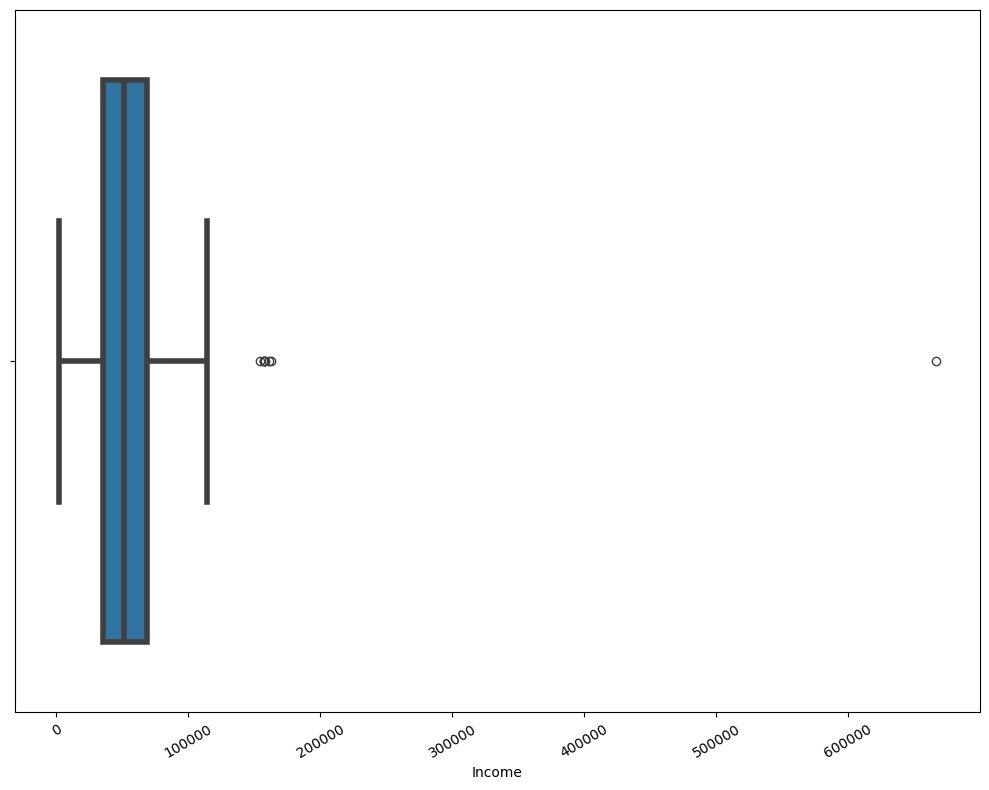

In [ ]:
#Akan dicek apakah terdapat outliers
#Membuat boxplot untuk mengidentifikasi outliers
#1. Membuat sizenya secara manual dengan figsize
#2. Menebalkan garis boxplot dengan membuat linewidth = 4
#3. Menggunakan tight_layout dan membuat nilai di sumbu x rotasi 30 derajat supaya dapat terlihat di visualisasi

plt.figure(figsize=(10,8))
sns.boxplot(
    data=df,
    x="Income",
    linewidth=4
)

plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

In [ ]:
#Terdapat outliers
# Mengidentifikasi outliers dengan IQR. Hal ini dilakukan dengan mengidentifikasi kuartil
q1 = df["Income"].quantile(0.25)
q3 = df["Income"].quantile(0.75)
IQR = q3 - q1
# Mengidentifikasi batas bawah dan batas atas data yang tidak termasuk outliers berdasarkan rumus IQR
bottom = q1 - 1.5*IQR
upper  = q3 + 1.5*IQR
#Membuat kondisi dimana data yang memenuhi kondisi tersebut bukan merupakan outliers
condition = (df["Income"]>bottom) & (df["Income"]<upper)
#Menampilkan batas bawah dan batas atas titik data bukan merupakan outliers
print(f"Batas bawah {bottom}")
print(f"Batas atas {upper}")

Batas bawah -14525.5
Batas atas 118350.5


In [ ]:
#Menghitung jumlah data yang melebihi batas atas dan merupakan outliers
df[df["Income"]>upper]["Income"].count()
#Ada 8 titik data yang merupakan outliers

8

In [ ]:
#Menghitung jumlah data yang kurang dari batas bawah dan merupakan outliers
df[df["Income"]<bottom]["Income"].count()
#Tidak ada outliers yang berada di bawah batas bawah dan merupakan outliers

0

In [ ]:
#Mencari persentase outliers terhadap keseluruhan data
((df[df["Income"]>upper]["Income"].count()) + (df[df["Income"]<bottom]["Income"].count()))/len(df)*100

0.36101083032490977

In [ ]:
#Karena persentasenya kecil outliersnya dihapus saja
df = df[(df["Income"]<upper)]

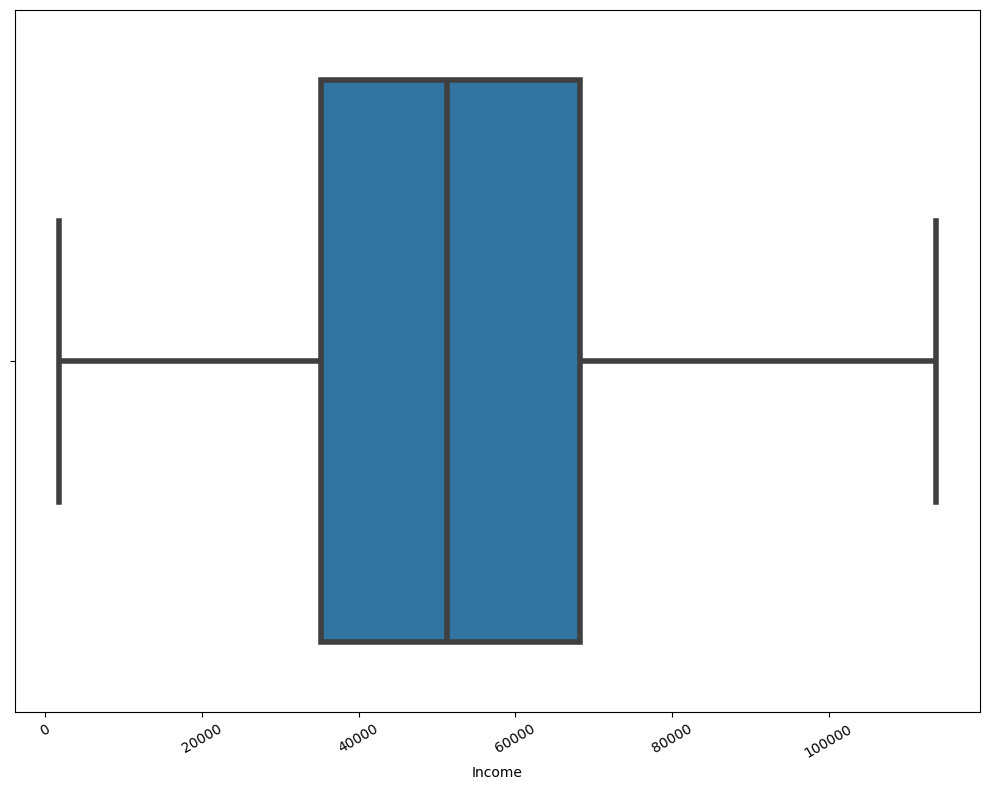

In [ ]:
#Akan dicek lagi apakah terdapat outliers
#Membuat boxplot untuk mengidentifikasi outliers
#1. Membuat sizenya secara manual dengan figsize
#2. Menebalkan garis boxplot dengan membuat linewidth = 4
#3. Menggunakan tight_layout dan membuat nilai di sumbu x rotasi 30 derajat supaya dapat terlihat di visualisasi

plt.figure(figsize=(10,8))
sns.boxplot(
    data=df,
    x="Income",
    linewidth=4
)

plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

**Outliers sudah ditangani**

**Melakukan One Way Anova**

In [ ]:
# preprocess data dengan membuat dataframe baru yang hanya berisi nilai dari kolom Education dan Income saja
df_subset = df[['Education', 'Income']]
df_subset.head()

,Education,Income
0,Graduation,58138.0
1,Graduation,46344.0
2,Graduation,71613.0
3,Graduation,26646.0
4,PhD,58293.0


In [ ]:
#Mengecek semua nilai
df_subset

,Education,Income
0,Graduation,58138.0
1,Graduation,46344.0
2,Graduation,71613.0
3,Graduation,26646.0
4,PhD,58293.0
...,...,...
2235,Graduation,61223.0
2236,PhD,64014.0
2237,Graduation,56981.0
2238,Master,69245.0


In [ ]:
# Melakukan one-way ANOVA dengan pingouin memakai anova
anova_res = df_subset.anova(dv='Income', between='Education', detailed=True)
anova_res.loc[:,['Source','SS','DF','MS','F','p-unc']]

,Source,SS,DF,MS,F,p-unc
0,Education,6.303620e+10,4,1.575905e+10,39.278884,8.234400e-32
1,Within,8.838638e+11,2203,4.012092e+08,NaN,NaN


In [ ]:
#Melakukan one-way ANOVA dengan stats memakai f_oneway
#Pertama dibagi terlebih dahulu dataset untuk masing - masing grup
Grad_df = df_subset[df_subset["Education"]=="Graduation"]["Income"]
PhD_df = df_subset[df_subset["Education"]=="PhD"]["Income"]
Master_df = df_subset[df_subset["Education"]=="Master"]["Income"]
Basic_df = df_subset[df_subset["Education"]=="Basic"]["Income"]
Cycle_df = df_subset[df_subset["Education"]=="2n Cycle"]["Income"]


In [ ]:
#Melakukan one-way ANOVA dengan stats memakai f_oneway
from scipy.stats import f_oneway
F,p = f_oneway(Grad_df, PhD_df, Master_df, Basic_df, Cycle_df)
print(f"Nilai F:{F} dan Nilai p-value:{p}")

Nilai F:39.278883537184974 dan Nilai p-value:8.234399637206527e-32


Nilai F dan p-value yang didapat dari kedua metode sama, yakni jika ditulis 6 angka dibelakang koma menjadi
* F: 39.278884
* p-value: 8.234400e-32

**Keterangan Tabel ANOVA**:

1. 'Source': Nama faktor
2. 'SS': Jumlah kuadrat
3. 'DF': Derajat kebebasan
4. 'MS': Kuadrat rata-rata
5. 'F': Nilai F
6. 'p-unc': Nilai-nilai p yang tidak dikoreksi
7. 'np2': Ukuran efek kuadrat parsial

**Interpretasi tabel ANOVA**:
* Nilai F value yang tinggi, yakni 39.278884, menunjukkan perbedaan yang signifikan antara rata-rata gaji (income) setiap kelompok tingkat pendidikan.
* Nilai p-value 8.234399637206527e-32 yang lebih kecil dari 0.05 (nilai alpha yang dipilih), menunjukkan bahwa perbedaan ini tidak mungkin terjadi karena variasi acak.
* **Kesimpulannya : Karena p-value < alpha, maka hipotesis H0 ditolak. Maka dari itu, dapat disimpulkan setidaknya ada satu kelompok dengan rata-rata gaji  (Income) yang berbeda dari yang lain.**
